In [47]:

%load_ext autoreload
%autoreload 2
from utils import read_full_timed_mosaics

spans = read_full_timed_mosaics(None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Parsing file ./result/infer_time_from329_to376.txt
Parsing file ./result/infer_time_from470_to517.txt
Parsing file ./result/infer_time_from188_to235.txt
Parsing file ./result/infer_time_from94_to141.txt
Parsing file ./result/infer_time_from799_to846.txt
Parsing file ./result/infer_time_from705_to752.txt
Parsing file ./result/infer_time_from658_to705.txt
Parsing file ./result/infer_time_from376_to423.txt
Parsing file ./result/infer_time_from517_to564.txt
Parsing file ./result/infer_time_from611_to658.txt
Parsing file ./result/infer_time_from893_to940.txt
Parsing file ./result/infer_time_from282_to329.txt
Parsing file ./result/infer_time_from564_to611.txt
Parsing file ./result/infer_time_from423_to470.txt
Parsing file ./result/infer_time_from235_to282.txt
Parsing file ./result/infer_time_from752_to799.txt
Parsing file ./result/infer_time_from47_to94.txt
Parsing file ./result/infer_time_from846_to893.t

In [48]:
spans[0]  # Start, End, # Remove, Time, # SNPs

[48065954.0, 48065991.0, 0, 4545.152407227742, 1]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
for  M= 1e-08, #Removal=808, #Mosaics = 11
for  M= 1e-07, #Removal=808, #Mosaics = 11
for  M= 1e-06, #Removal=808, #Mosaics = 11
for  M= 1e-05, #Removal=808, #Mosaics = 11
for  M= 0.0001, #Removal=808, #Mosaics = 11
for  M= 0.001, #Removal=808, #Mosaics = 11


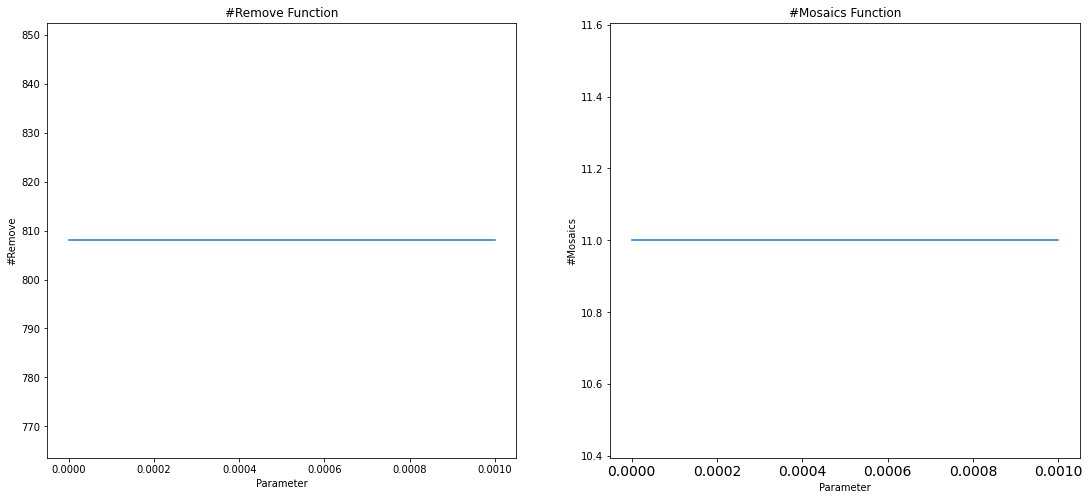

In [52]:
%load_ext autoreload
%autoreload 2
from BlockSelector import BlockSelector
from operator import itemgetter
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

rho_result =[]
m_set = range(1, 5, 1)
# m_set = [0.001, 0.001, 0.01, 0.03, 0.07, 0.1, 0.3, 0.5, 0.7, 1, 3, 6, 10, 20, 40, 100, 1000]
# m_set = np.linspace(0,0.03,30)
m_set = [0.00000001, 0.0000001,0.000001, 0.00001, 0.0001, 0.001]
for m in m_set:
    bs = BlockSelector(spans)
    bs.find_best_match(m)
    result = bs.get_best_match_mosaics()
    stats = bs.get_statistics()
    rho_result.append([m, stats[0], stats[1]])
    print(f'for  M= {m}, #Removal={stats[0]}, #Mosaics = {stats[1]}')
    with open(f'./result/hotspots_{m}.txt', 'w') as f:
        f.write("%s\n" % result)


  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1,2)

figure.set_size_inches(18.5, 8)
# For Sine Function
X= [None]*5
Y= [None]*5
for i in range(0, 2):
    rho_result = sorted(rho_result, key=itemgetter(0))
    Y[i+1] = list(zip(*rho_result))[i+1]
    X[i+1] = list(zip(*rho_result))[0]

axis[0].plot(X[1], Y[1])
axis[0].set_title("#Remove Function")
# axis[0].xlabel('Length', fontsize=14)
# axis[0].ylabel('Score', fontsize=14)
# For Cosine Function
axis[1].plot(X[2], Y[2])
axis[1].set_title("#Mosaics Function")

plt.setp(axis[0], xlabel='Parameter', ylabel="#Remove")
plt.setp(axis[1], xlabel='Parameter', ylabel="#Mosaics")

plt.xticks(fontsize=14)

# Combine all the operations and display
plt.show()

In [6]:
import statistics

times = list(zip(*spans))[3]
mx = max(times)
mn = min(times)
x = statistics.mean(times)
statistics.median(times)
print(sum(times)/len(times))

557.6013081367204


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(48076952, 174)


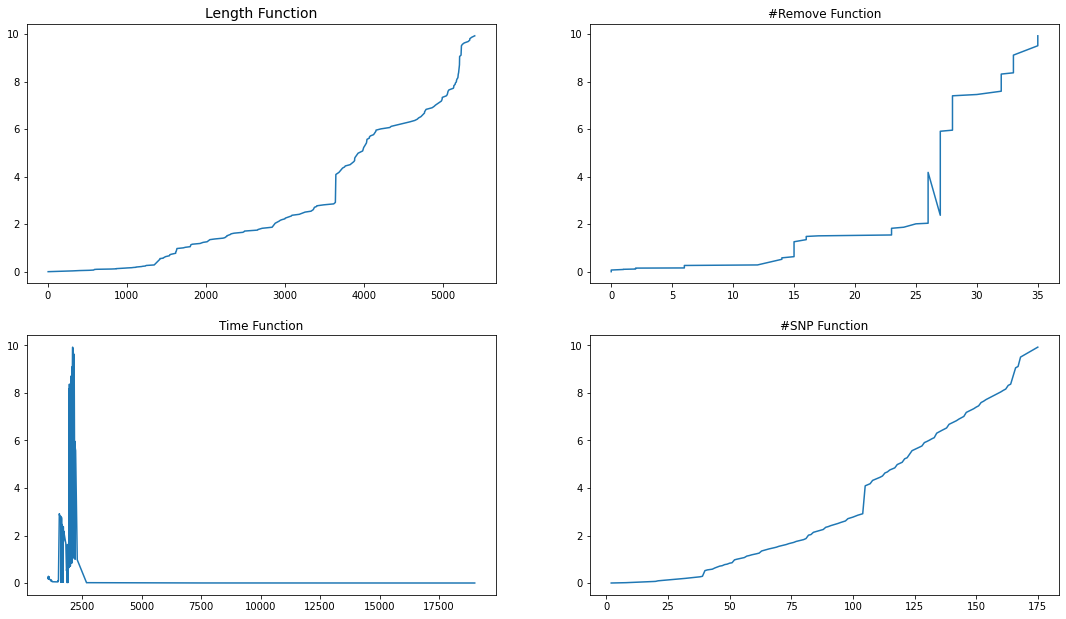

In [15]:
%load_ext autoreload
%autoreload 2
from BlockSelector import find_haplo_score


## Check scores for spans end in a location
end_positions = list(zip(*spans))[1]
max(times)

from collections import Counter

new_vals = Counter(end_positions).most_common()
new_vals = new_vals[::-1] #this sorts the list in ascending order

print(new_vals[-1])
pos = new_vals[-1][0]
pos_spans = [s for s in spans if s[1]==pos]

pos_spans
info = []
#Length, Remove, Time, SNP, Score

PARAMETER=0.00001


for s in pos_spans:
    score = find_haplo_score(s, PARAMETER)
    info.append([s[1]-s[0]+1, s[2], s[3], s[4], score])
from operator import itemgetter




# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 2)

figure.set_size_inches(18.5, 10.5)
# For Sine Function
X= [None]*5
Y= [None]*5
for i in range(0, 4):
    info = sorted(info, key=itemgetter(i))
    X[i+1] = list(zip(*info))[i]
    Y[i+1] = list(zip(*info))[4]

axis[0, 0].plot(X[1], Y[1])
axis[0, 0].set_title("Length Function", fontsize=14)
  
# For Cosine Function
axis[0, 1].plot(X[2], Y[2])
axis[0, 1].set_title("#Remove Function")
  
# For Tangent Function
axis[1, 0].plot(X[3], Y[3])
axis[1, 0].set_title("Time Function")
  
# For Tanh Function
axis[1, 1].plot(X[4], Y[4])
axis[1, 1].set_title("#SNP Function")

# Combine all the operations and display
plt.show()

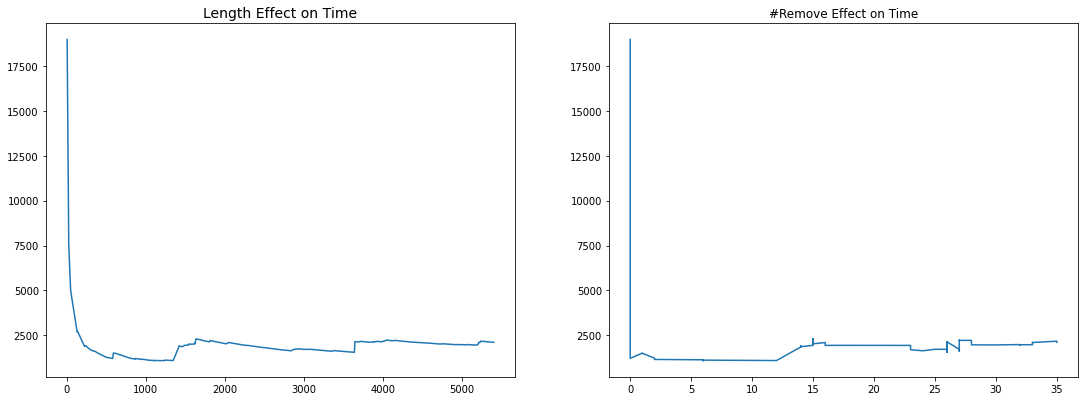

In [8]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(1, 2)

figure.set_size_inches(18.5, 6.5)
# For Sine Function

#Length, Remove, Time, SNP, Score

X = [None]*5
Y = [None]*5
for i in range(0, 4):
    info = sorted(info, key=itemgetter(i))
    X[i+1] = list(zip(*info))[i]
    Y[i+1] = list(zip(*info))[2]

axis[0].plot(X[1], Y[1])
axis[0].set_title("Length Effect on Time", fontsize=14)

# For Cosine Function
axis[1].plot(X[2], Y[2])
axis[1].set_title("#Remove Effect on Time")

# Combine all the operations and display
plt.show()


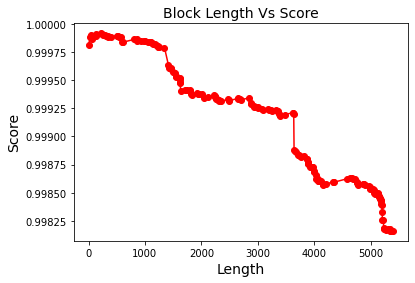

In [10]:
import matplotlib.pyplot as plt
   
info = sorted(info, key=itemgetter(0))
X = list(zip(*info))[0]
Y = list(zip(*info))[4]

plt.plot(X, Y, color='red', marker='o')
plt.title('Block Length Vs Score', fontsize=14)
plt.xlabel('Length', fontsize=14)
plt.ylabel('Score', fontsize=14)
# plt.grid(True)
plt.show()

In [9]:
info
#Length, Remove, Time, SNP, Score


[[5, 0, 18995.934669422833, 2, 0.9998100586944401],
 [25, 0, 7560.445721903426, 3, 0.9998865997444666],
 [49, 0, 5015.384515187109, 4, 0.9998996973403445],
 [56, 0, 4803.544225986501, 5, 0.9998799186046983],
 [64, 0, 4568.564853359938, 6, 0.9998629524462733],
 [131, 0, 2685.976291213646, 7, 0.9999059952485311],
 [137, 0, 2710.0405217789166, 8, 0.9998916042543723],
 [224, 0, 1877.4472574029285, 9, 0.9999155184421846],
 [241, 0, 1911.441351244724, 10, 0.9999044324993023],
 [252, 0, 1862.3242882727186, 11, 0.9998975774096966],
 [292, 0, 1705.9089344404829, 12, 0.9998976507019803],
 [315, 0, 1655.8416015390617, 13, 0.9998923760877688],
 [339, 0, 1608.2872376080256, 14, 0.9998874262302698],
 [350, 0, 1615.366837896811, 15, 0.9998788548258271],
 [401, 0, 1482.3637618935643, 16, 0.999881417930458],
 [500, 0, 1261.8659867059162, 17, 0.9998927471431289],
 [525, 0, 1244.3138318721456, 18, 0.9998880180255809],
 [546, 0, 1235.6340706086814, 19, 0.9998826216526695],
 [581, 0, 1203.2657285467806, 20

In [48]:
from utils import read_spans, get_all_haplo_input_files
spans, R = read_spans('./result/from47_to94.txt')


Parsing file ./result/from47_to94.txt


In [49]:
spans[0]

[48056228, 48056228, []]

In [50]:
len(R)

48

In [11]:
# def find_centers(mutations, start, end):
#     M = sorted(mutations)
#     R =[start]
#     for i in range(len(M)-1):
#         R.append((M[i]+M[i+1])/2)
#     R.append(end)
#     return R
# X= [1, 6, 3,2]
# C = find_centers(X, -4, 100)
# print(C)



# find_span_mosaic(C, 2, 6)



In [80]:
X

[1, 6, 3, 2]

In [64]:
from SNPDataSet import get_snp_dfs
mutation_df = get_snp_dfs()


In [69]:
A= mutation_df['position'].unique()
A.sort()
muts = [p for p in A]


In [70]:
muts

[48055094,
 48055095,
 48055110,
 48055247,
 48055250,
 48055294,
 48055331,
 48055340,
 48055357,
 48055364,
 48055372,
 48055374,
 48055376,
 48055377,
 48055386,
 48055404,
 48055424,
 48055428,
 48055432,
 48055434,
 48055435,
 48055443,
 48055448,
 48055482,
 48055493,
 48055602,
 48055659,
 48055671,
 48055728,
 48055741,
 48055746,
 48055748,
 48055751,
 48055779,
 48055785,
 48055821,
 48055894,
 48055898,
 48055971,
 48056038,
 48056059,
 48056083,
 48056092,
 48056128,
 48056154,
 48056160,
 48056167,
 48056228,
 48056309,
 48056376,
 48056398,
 48056409,
 48056504,
 48056578,
 48056597,
 48056736,
 48056791,
 48056817,
 48056875,
 48056922,
 48056955,
 48056967,
 48056968,
 48056981,
 48057031,
 48057086,
 48057101,
 48057106,
 48057309,
 48057310,
 48057315,
 48057324,
 48057341,
 48057400,
 48057419,
 48057421,
 48057464,
 48057480,
 48057546,
 48057570,
 48057604,
 48057620,
 48057628,
 48057643,
 48057701,
 48057703,
 48057708,
 48057719,
 48057735,
 48057766,
 48057783,

In [73]:
P=-1
c=0
for x in muts:
    if x==P:
        c+=1
    P=x
print(c)

44


In [74]:
len(muts)

928

In [94]:
from run_generate_times import  infer_times

infer_times('./result/from0_to47.txt')

Parsing file ./result/from0_to47.txt
[48055094, 48055094, []]
[48055094, 48055095, []]
[48055094, 48055110, []]
[48055094, 48055247, []]
[48055094, 48055250, []]
inferring 1 of 5
start finding tmrca for position 48055079 to 48055094.5 with Length 16
start inferring time 
start inferring date  for 1 Trees
7903.40217285556
start finding tmrca for position 48055079 to 48055102.5 with Length 24
start inferring time 
start inferring date  for 1 Trees
6166.33262257789
start finding tmrca for position 48055079 to 48055178.5 with Length 100
start inferring time 
start inferring date  for 1 Trees
2237.654205662746
start finding tmrca for position 48055079 to 48055248.5 with Length 170
start inferring time 
start inferring date  for 1 Trees
1498.5657826038027
start finding tmrca for position 48055079 to 48055272.0 with Length 194
start inferring time 
start inferring date  for 1 Trees
1354.2122985063227
